# Project 1 FYS-STK4155

## Part a): Ordinary Least Square (OLS) on the Franke function

### Franke Function

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
import seaborn as sns
import load_data as ld

In [2]:
# Standarize the data
np.random.seed(42)

# Make data
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
xv, yv = np.meshgrid(x,y)
z = f.FrankeFunction(xv, yv)

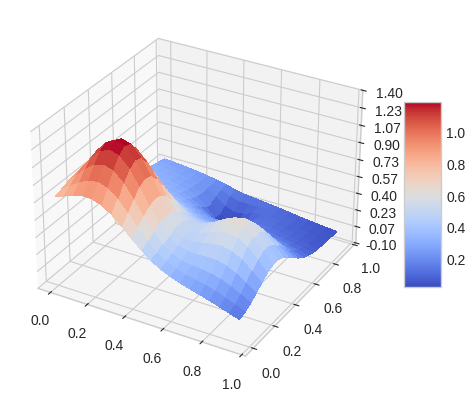

In [3]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Most off the code in the Franke function task is taken from the description in Project 1. 

### Own Code

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X.shape (1000, 10)
z.shape (1000, 1000)
Mse: 0.002053039278719581
R2: 0.9751293361571949


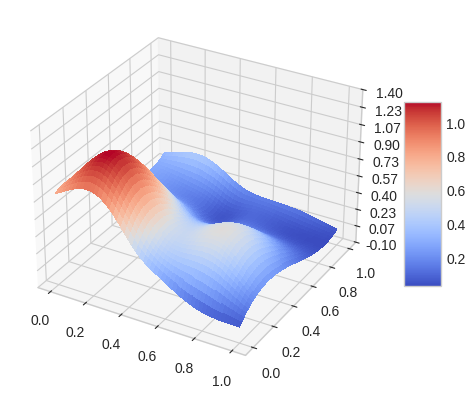

In [5]:
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
xv, yv = np.meshgrid(x, y)
z = f.FrankeFunction(xv, yv) #Use xv and yv only when plotting the FranckeFunction
z = z #+ np.random.randn(z.shape[0]) noise messes up here?

# Polynomial degree
degree = 3

# Creating design matrix
X = f.create_design_matrix(x, y, degree)
#X = np.identity(X.shape[0]) #to test if it works

print("X.shape", X.shape)
print("z.shape", z.shape)

OLSbeta = np.linalg.pinv(X.T @ X) @ X.T @ z # pinv avoid singular matrix problem, same as reg term

ztilde = X @ OLSbeta

mse = np.mean((z - ztilde)**2)
R2 = 1 - np.sum((z - ztilde)**2) / np.sum((z - np.mean(z))**2)

#print(f"Beta: {OLSbeta}")
print(f"Mse: {mse}")
print(f"R2: {R2}")

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(xv, yv, ztilde, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# Test set up with identity matrix

In [6]:
x, y, z = ld.load_uniform_data()

# Polynomial degrees
degrees = np.arange(0, 5)

# Empty lists to store scores and parameters
beta_values = []
mse_scores = []
r2_scores = []

# Looping through each degree
for degree in degrees:
    # Creating design matrix
    X = f.create_design_matrix(x, y, degree)
    print("design matrix shape", X.shape)
    X = np.identity(X.shape[0])

    # Split the data into training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

    # Calculating OLS beta
    OLSbeta = f.beta_OLS(X_train, z_train)
    print("olsbeta.shape", OLSbeta.shape)
    
    # Calculating ztilde
    ztilde = f.z_predict(X_train, OLSbeta)
    
    # Calculating MSE and R2
    mse = f.mse(z_train, ztilde)
    print("mse", mse)
    r2 = f.r2(z_train, ztilde)
    print("r2", r2)

    # Appending beta values and scores
    beta_values.append(OLSbeta)
    mse_scores.append(mse)
    r2_scores.append(r2)


design matrix shape (100, 1)
olsbeta.shape (100, 1)
mse 0.0
r2 1.0
design matrix shape (100, 3)
olsbeta.shape (100, 1)
mse 0.0
r2 1.0
design matrix shape (100, 6)
olsbeta.shape (100, 1)
mse 0.0
r2 1.0
design matrix shape (100, 10)
olsbeta.shape (100, 1)
mse 0.0
r2 1.0
design matrix shape (100, 15)
olsbeta.shape (100, 1)
mse 0.0
r2 1.0


result with identity matrix and without scaling: mse = 0 

# Compute with random data from the uniform distribution

In [7]:
x, y, z = ld.load_uniform_data()
# Polynomial degrees
degrees = np.arange(0, 8)

# Empty lists to store scores and parameters
beta_values = []
mse_scores = []
r2_scores = []

# Looping through each degree
for degree in degrees:
    # Creating design matrix
    X = f.create_design_matrix(x, y, degree)

    # Split the data into training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

    # Scale and center the data
    X_train, X_test = f.scale_train_test(train = X_train, test = X_test)
    z_train, z_test = f.scale_train_test(train = z_train, test = z_test)
    
    # Calculating OLS beta
    OLSbeta = f.beta_OLS(X_train, z_train)

    # Calculating ztilde
    ztilde = f.z_predict(X_test, OLSbeta)
    
    # Calculating MSE and R2
    mse = f.mse(z_test, ztilde)
    r2 = f.r2(z_test, ztilde)

    # Appending beta values and scores
    beta_values.append(OLSbeta)
    mse_scores.append(mse)
    r2_scores.append(r2)

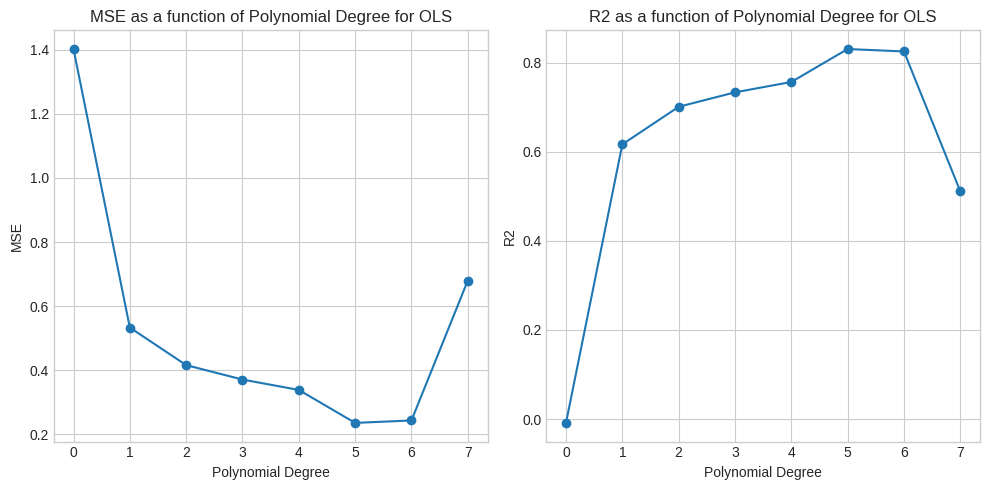

In [8]:
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree for OLS')

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree for OLS')
plt.tight_layout()
plt.savefig(fname="../../results/ols_error_degree.png")
#plt.show()

degree 0 betavalues 1
[[0.]]
 
degree 1 betavalues 3
[[ 0.        ]
 [-0.49098033]
 [-0.73132683]]
 
degree 2 betavalues 6
[[ 0.        ]
 [-0.99076374]
 [-0.74666814]
 [ 0.13687699]
 [ 0.54796627]
 [-0.39078914]]
 
degree 3 betavalues 10
[[ 0.        ]
 [-0.49934752]
 [ 1.77620368]
 [-1.3955056 ]
 [ 0.96984715]
 [-7.51693277]
 [ 0.97091905]
 [-0.03570585]
 [-0.34591019]
 [ 4.74726185]]
 
degree 4 betavalues 15
[[  0.        ]
 [  5.3616468 ]
 [  5.12931339]
 [-24.13307255]
 [ -4.81480395]
 [-19.08918413]
 [ 29.22132316]
 [  7.94865996]
 [  5.79665159]
 [ 18.23659814]
 [-11.29520671]
 [ -3.87816654]
 [ -1.86402938]
 [ -2.80415715]
 [ -5.11598073]]
 
degree 5 betavalues 21
[[  0.        ]
 [ 10.94844793]
 [  7.11211748]
 [-57.39128568]
 [-10.34599297]
 [-27.65688389]
 [ 94.80243193]
 [ 25.81336003]
 [ 17.86644824]
 [ 25.82495475]
 [-63.44880844]
 [-31.54962738]
 [ -0.31477641]
 [-24.92942762]
 [  0.83787893]
 [ 14.43454129]
 [ 12.55090694]
 [ -0.50023633]
 [  1.29874899]
 [ 10.00616077]

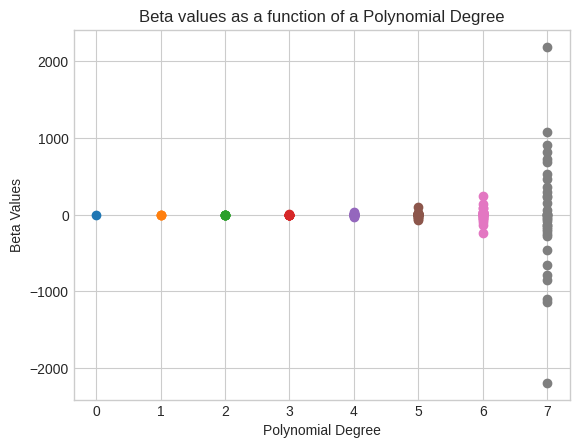

In [10]:
for degree, values in enumerate(beta_values):
    print("degree", degree, "betavalues", len(values))
    print(values)
    print(" ")
    degrees = np.repeat(degree, len(values))
    plt.scatter(degrees, values)

plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Values')
plt.title('Beta values as a function of a Polynomial Degree')
f.save_to_results("beta_ols.png")

